# 

In [1]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
import os

import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.figure_factory as ff

import re
import emoji 
import demoji
import contractions
from tqdm import tqdm

#nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


import pyLDAvis
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mrtcloud-8/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mrtcloud-8/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mrtcloud-8/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mrtcloud-8/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
with open('before_war_dict.pkl', 'rb') as f:
    before_war_dict = pickle.load(f)
with open('war_and_after_dict.pkl', 'rb') as f:
    war_and_after_dict = pickle.load(f)

with open('before_war_corpora.pkl', 'rb') as f:
    before_war_corpora = pickle.load(f)
with open('war_and_after_corpora.pkl', 'rb') as f:
    war_and_after_corpora = pickle.load(f)
    
with open('before_war_cleaned.pkl', 'rb') as f:
    before_war = pickle.load(f)
    print(before_war.shape)
with open('war_and_after_cleaned.pkl', 'rb') as f:
    war_and_after = pickle.load(f)
    print(war_and_after.shape)
    
with open('before_war_vect.pkl', 'rb') as f:
    before_war_vect = pickle.load(f)
with open('war_and_after_vect.pkl', 'rb') as f:
    war_and_after_vect = pickle.load(f)




with open('before_war_sample.pkl', 'rb') as f:
    before_war_sample = pickle.load(f)
with open('war_and_after_sample.pkl', 'rb') as f:
    war_and_after_sample = pickle.load(f)


with open('before_war_titles.pkl', 'rb') as f:
    before_war_titles = pickle.load(f)
with open('war_and_after_titles.pkl', 'rb') as f:
    war_and_after_titles = pickle.load(f)

(835142, 6)
(8268526, 6)


In [3]:
before_war_vect = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_features=5000,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.85,
                                min_df = 5,
                                ngram_range=(2,4))
before_war_tfidf = before_war_vect.fit_transform(before_war_sample['cleaned_text'])
print(before_war_tfidf.shape)

war_and_after_vect = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_features=5000,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.85,
                                min_df = 5,
                                ngram_range=(2,4))

war_and_after_tfidf = war_and_after_vect.fit_transform(war_and_after_sample['cleaned_text'])
print(war_and_after_tfidf.shape)

(173585, 5000)
(1262618, 5000)


0         2022-02-23
1         2022-02-23
2         2022-02-23
3         2022-02-23
4         2022-02-23
             ...    
835137    2021-12-31
835138    2021-12-31
835139    2021-12-31
835140    2021-12-31
835141    2021-12-31
Name: date, Length: 835142, dtype: object


Calculating Log-Likelihoods: 100%|█████████████| 14/14 [39:31<00:00, 169.41s/it]


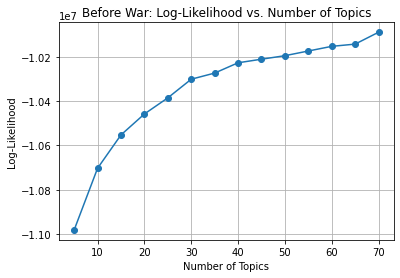

In [53]:
#GET NUM OF TOPICS BEFORE WAR
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


# Define a function to train LDA models and calculate log-likelihood
def calculate_log_likelihood(data, min_topics, max_topics, step_size):
    log_likelihoods = []
    topic_range = range(min_topics, max_topics + step_size, step_size)
    
    # Wrap the loop with tqdm to display a progress bar
    for num_topics in tqdm(topic_range, desc='Calculating Log-Likelihoods'):
        lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        lda_model.fit(data)
        log_likelihood = lda_model.score(data)
        log_likelihoods.append(log_likelihood)
    
    return topic_range, log_likelihoods

# Calculate log-likelihoods
min_topics = 5
max_topics = 70
step_size = 5
topic_range, log_likelihoods = calculate_log_likelihood(before_war_tfidf, min_topics, max_topics, step_size)

# Plot log-likelihoods
plt.plot(topic_range, log_likelihoods, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Log-Likelihood')
plt.title('Before War: Log-Likelihood vs. Number of Topics')
plt.grid(True)
plt.show()

#Copilot told me most optimal number would be 60(?)

In [ ]:
#BEFORE WAR ITERATIONS
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


# Define a function to train LDA models and calculate log-likelihood
def calculate_log_likelihood(data, min_topics, max_topics, step_size):
    log_likelihoods = []
    topic_range = range(min_topics, max_topics + step_size, step_size)
    
    # Wrap the loop with tqdm to display a progress bar
    for num_iter in tqdm(topic_range, desc='Calculating Log-Likelihoods'):
        lda_model = LatentDirichletAllocation(n_components=15, max_iter=num_iter, random_state=42)
        lda_model.fit(data)
        log_likelihood = lda_model.score(data)
        log_likelihoods.append(log_likelihood)
    
    return topic_range, log_likelihoods

# Calculate log-likelihoods
min_iter= 50
max_iter = 200
step_size = 10
topic_range, log_likelihoods = calculate_log_likelihood(before_war_tfidf, min_iter, max_iter, step_size)

plt.figure(figsize=(12, 10))
# Plot log-likelihoods
plt.plot(topic_range, log_likelihoods, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Log-Likelihood')
plt.title('Before War: Log-Likelihood vs. Number of Topics')
plt.grid(True)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

before_war_lda = LatentDirichletAllocation(n_components=12,
                                   max_iter=200,
                                   learning_method='online',
                                   random_state = 42)

before_war_lda.fit(before_war_tfidf)

In [53]:
#at max_iter = 200, n_components = 12
vocab_before_war = list(before_war_vect.get_feature_names_out())
#Read pickled after_war_LDAs
visual = pyLDAvis.lda_model.prepare(before_war_lda, before_war_tfidf, before_war_vect, vocab=vocab_before_war )
visual

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.177687  0.088478       1        1  10.049868
8     -0.225872 -0.211133       2        1   9.804505
1      0.051731 -0.073140       3        1   9.462109
11     0.252465 -0.007750       4        1   9.337779
5     -0.143373  0.220368       5        1   8.341678
10    -0.099896 -0.218701       6        1   8.185664
7      0.239915 -0.021957       7        1   7.769392
3     -0.158991  0.237045       8        1   7.761462
9     -0.118278  0.012819       9        1   7.589312
4     -0.032299 -0.165809      10        1   7.378449
0     -0.059191  0.142815      11        1   7.173135
6      0.116102 -0.003035      12        1   7.146646, topic_info=                               Term          Freq         Total Category  \
4197         travel active war zone  33751.000000  33751.000000  Default   
4093          thank russiaun letter  20198.000000  20198.000000  Default   
4141          tigrayan people stuck  11711.000000  11711.000000  Default   
3846                   stop killing  11471.000000  11471.000000  Default   
4094    thank russiaun letter dated  10969.000000  10969.000000  Default   
...                             ...           ...           ...      ...   
4050             targeting civilian   1407.371813   1630.635920  Topic12   
3040                refugee ukraine   2792.112736   3954.640005  Topic12   
3216     russia kyiv odessa kharkiv   3990.442951  34862.807466  Topic12   
2827  president volodymyr zelenskyy    831.385361   3254.508081  Topic12   
4197         travel active war zone    757.025117  33751.277471  Topic12   

      logprob  loglift  
4197  30.0000  30.0000  
4093  29.0000  29.0000  
4141  28.0000  28.0000  
3846  27.0000  27.0000  
4094  26.0000  26.0000  
...       ...      ...  
4050  -4.3243   2.4913  
3040  -3.6392   2.2904  
3216  -3.2821   0.4710  
2827  -4.8507   1.2738  
4197  -4.9444  -1.1589  

[450 rows x 6 columns], token_table=      Topic      Freq                                 Term
term                                                      
24        4  0.997996                     aching heart add
98        8  0.999496                  airstrike maternity
109       1  0.999181                            amp child
125       4  0.999467         amp light historic milestone
133       7  0.999424                           amp people
...     ...       ...                                  ...
4959     10  0.263471                       year feel hate
4973      5  0.998659              yellow heart blue heart
4974      5  0.999105        yellow heart standwithukraine
4978      7  0.999047  young mathematician winner european
4993      8  0.998444              zelenskyyua person kyiv

[438 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 2, 12, 6, 11, 8, 4, 10, 5, 1, 7])

In [ ]:
before_war_lda2 = LatentDirichletAllocation(n_components=12,
                                   max_iter=300,
                                   learning_method='online',
                                   random_state = 42)

before_war_lda2.fit(before_war_tfidf)

import pyLDAvis.lda_model

#at max_iter = 110, n_components = 12
vocab_before_war2 = list(before_war_vect.get_feature_names_out())
#Read pickled after_war_LDAs
visual = pyLDAvis.lda_model.prepare(before_war_lda2, before_war_tfidf, before_war_vect, vocab=vocab_before_war )
visual

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.195605 -0.028704       1        1  10.021147
8      0.248586  0.157005       2        1   9.777000
1     -0.026748  0.062671       3        1   9.464989
11    -0.257116  0.065664       4        1   9.333727
5      0.085590 -0.240496       5        1   8.280267
10     0.153837  0.180805       6        1   8.200383
7     -0.230249  0.083205       7        1   7.800341
3      0.091680 -0.271096       8        1   7.755704
9      0.122314 -0.003184       9        1   7.643705
4      0.090771  0.167671      10        1   7.389880
0      0.028558 -0.167669      11        1   7.199342
6     -0.111618 -0.005872      12        1   7.133515, topic_info=                               Term          Freq         Total Category  \
4197         travel active war zone  36153.000000  36153.000000  Default   
4093          thank russiaun letter  19955.000000  19955.000000  Default   
1542                hand light skin  20887.000000  20887.000000  Default   
4141          tigrayan people stuck  11684.000000  11684.000000  Default   
4094    thank russiaun letter dated  12026.000000  12026.000000  Default   
...                             ...           ...           ...      ...   
3040                refugee ukraine   3712.072238   5447.585498  Topic12   
4050             targeting civilian   1071.240713   1252.226527  Topic12   
3216     russia kyiv odessa kharkiv   2579.687176  26403.674940  Topic12   
4197         travel active war zone    920.501957  36153.266616  Topic12   
2827  president volodymyr zelenskyy    654.454614   2644.227657  Topic12   

      logprob  loglift  
4197  30.0000  30.0000  
4093  29.0000  29.0000  
1542  28.0000  28.0000  
4141  27.0000  27.0000  
4094  26.0000  26.0000  
...       ...      ...  
3040  -3.3526   2.2568  
4050  -4.5953   2.4843  
3216  -3.7165   0.3145  
4197  -4.7470  -1.0302  
2827  -5.0881   1.2440  

[459 rows x 6 columns], token_table=      Topic      Freq                                 Term
term                                                      
24        4  0.998795                     aching heart add
98        8  0.998958                  airstrike maternity
109       1  0.999547                            amp child
125       4  0.998494         amp light historic milestone
133       7  0.998995                           amp people
...     ...       ...                                  ...
4959     10  0.269690                       year feel hate
4973      5  0.998845              yellow heart blue heart
4974      5  0.998793        yellow heart standwithukraine
4978      7  0.999216  young mathematician winner european
4993      8  0.997687              zelenskyyua person kyiv

[464 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 2, 12, 6, 11, 8, 4, 10, 5, 1, 7])

In [ ]:
#war_and_after
war_and_after_lda = LatentDirichletAllocation(n_components=20,
                                   max_iter=200,
                                   learning_method='online',
                                   random_state = 42)


war_and_after_lda.fit(war_and_after_tfidf)

In [ ]:
vocab_war_and_after = list(war_and_after_vect.get_feature_names_out())
#Read pickled after_war_LDAs
vis = pyLDAvis.lda_model.prepare(war_and_after_lda, war_and_after_tfidf, war_and_after_vect, vocab=vocab_war_and_after )
vis


Calculating Log-Likelihoods: 100%|██████████| 10/10 [9:01:55<00:00, 3251.50s/it]


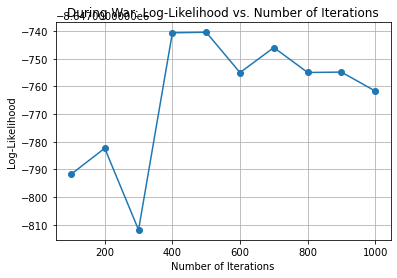

In [48]:
#OLD
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


# Define a function to train LDA models and calculate log-likelihood
def calculate_log_likelihood(data, min_topics, max_topics, step_size):
    log_likelihoods = []
    topic_range = range(min_topics, max_topics + step_size, step_size)
    
    # Wrap the loop with tqdm to display a progress bar
    for num_iter in tqdm(topic_range, desc='Calculating Log-Likelihoods'):
        lda_model = LatentDirichletAllocation( max_iter=num_iter, random_state=42)
        lda_model.fit(data)
        log_likelihood = lda_model.score(data)
        log_likelihoods.append(log_likelihood)
    
    return topic_range, log_likelihoods

# Calculate log-likelihoods
min_iter= 100
max_iter = 1000
step_size = 100
topic_range, log_likelihoods = calculate_log_likelihood(war_and_after_tfidf, min_iter, max_iter, step_size)

# Plot log-likelihoods

plt.plot(topic_range, log_likelihoods, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Log-Likelihooddata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAY0AAAEWCAYAAACaBstRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsTAAALEwEAmpwYAABE1UlEQVR4nO3dd3yV5dnA8d+VPdgrQIAg04EIsoI4wAW1WimtCipoa2u1rlprrfV9W+1y6yt1tGrV4gAXFUeVFjWKypCNgwRQNgkbEgiQcb1/PPeBk3CSnJCcnHV9P5/zyTnPvM+dc57r3OO5b1FVjDHGmGAkhDsBxhhjoocFDWOMMUGzoGGMMSZoFjSMMcYEzYKGMcaYoFnQMMYYEzQLGk1EREpEpEe40xFr/PNVRJ4TkT8dxTEO7Scip4lIvt+6NSJyduOluMY03CkiL4T6POHUVHlZw7mzRORjESkWkQfDkYa6iMi7InJFuNNRFwsa1bgPdqn7cO0Skc9E5BoRaVBeqWozVf2msdIJICKdRERFJMtv2R01LHuvMc/tjjtSRDY09nEDnKfGYNDY+aqqs1W1b2MdL1KJSHf3OXmn2vIXROTOMCUrlK4GtgEtVPWW6iur/XDw5U1SqBIT6EeCqn5HVf8ZqnM2FgsagV2gqs2BHOAe4DbgH0dzoFB+8FR1M7AKON1v8enAigDLPq7PsUOZbhNRckVkRLgTUR9H+dnMAb7SJribOda/OxY0aqGqu1X1TeAS4AoR6QcgInki8hPfdiJypYh84vdaReQ6EVkJrPRb1ss9f05EHhORd1yJZp6I9PTb/1wRyReR3SLyuIh85H++aj7GBQgRSQQGAo9UWzYc+FhEeorIByKyXUS2iciLItLK77xrROQ2EVkG7G3Ih19EjnP5tEtEvhSR7/mtaysib4nIHhH5XET+5J9/9TzPoXyttry5iHwoIpPFc6yI/FdEdri8vbiG4wUqPQ0QkWXu//GyiKT5bf9TEVnljvumiHT2W3eKe3+73d9T/NYd4/6vxSLyX6BdLe/xaxE53+91kvv/nSwiaa50sN3l9ef+pcwg3AcELMVV/1y7ZdU/x4+LV61SIiKfikhHEfk/EdkpIitEZGC1ww4Rka/c+mer5eX5IrJEDpfw+/utq/OzWVN+i8hzwBXAr10666oi8/3A2uW2H+6O82P3v9gpIjNFJKdavlT/zj8iIuvd53yhiJzmlo8Bfgtc4o6/1C0/dF0RkQQR+R8RWSsiW0Rkioi0dOt8JaErRGSd+yzc4ZeWoSKywJ23SEQequP91osFjSCo6nxgA3BaPXYbCwwDjq9h/QTgLqA1XmnhzwAi0g54DbgdaAvkA6fUcAzwCxp4AWMF8H61ZcnAfECAu4HOwHFAV+DOAOn6LtBKVcvdxfLSut6sPxFJBt4C/gN0AG4AXhQRX7XPY8BeoCPel7lR63FFpC1eHnyqqjcCGcB/gZdceiYAj4vICUEe8mJgDHAM0B+40p3nTLz8vBjoBKwFprl1bYB3gMl4/8eHgHdc2nBpWYgXLP5I7Xkw1aXZZzSwTVUXuf1a4v0v2wLXAKVBvi/w/hd9griQ1uRi4H/w3scBYA6wyL1+De99+7vMpb8n0Mfti4icDDwD/My9j78Db4pIqt++VT6b/getLb9V9UrgReA+V505q4735PvutHLbzxGRsXgX+nFAe2A23v/F31iqfuc/BwYAbfD+36+KSJqqvgf8BXjZHf+kAGm40j1GAT2AZsCj1bY5FegLnAX8TkSOc8sfAR5R1RZ4+fxKHe+3XuI+aIjIABGZ637hLABSati0CLhORFYAQ/D+kf6yXfT3/WKcD3wAzBGRJW6Z75/qf+F4CO8DPcB9Qd7Gu8jfBnTB+xIUAsNFZKV7+F9gVgP9RWQ18BTehXIl0E5E/g68C1QA/VR1lar+F++D+AnQG7jI71gJ7twf4H1hW6tqf1V9qZYsTBSR/7hfYF+JSHcgF+9Dfo+qHlTVD9z7miBeyecHwO9VdZ+qfgU0Zj1uZ+Aj4FVV/R+37Hxgjao+q6rl7mL7OvDDII85WVU3qeoOvGA4wC2/DHhGVRep6gG8QD/c5cF3gZWq+rw751S8gH6BiHTD+wz9r6oeUNWP3XFr8hLwPRHJcK8vdcsAyvA+T71UtUJVF6rqniDfF8B+vB8s9e5A4PzLnXM/8C9gv6pOUdUK4GW8Hy3+HlXV9S4v/8zhYPhT4O+qOs+9j3/iBaFcv30nu30DBcUa8/so31d1PwPuVtWvXcD6C953Nsdvm7tVdYcvfar6gqpud+l5EEjFu8gH4zLgIVX9RlVL8D5b46uVsO5S1VJVXQosBXzBpwzoJSLtVLVEVece9bsOIO6DBl7x/C5VHQD8Du9XQSDHA4tV9VhgAbDZb10boBWwzm/Zc6o6wB13olv2tfubC8zAu2j3BvrhXWSvcuvfAh4G7nV1sIXA9/B+xQwFfi8ird22N+I18P3CpaGZW/4tMAgvOEwDnhCRDiLyMt4FvDPQHGgvIr5fRi2BOaraG++X+m9qyAt/bYD7VfU4l7Yt7tjrVbXSb7u1QDber7QkYL3fukPPReS3rsheIiJ/C+L81X0XSAf8980Bhrlqj10isgvvS9kxyGMW+j3fx+E87oz3vgBwX+7teO+zyjpnrd+6naq6t9q6gFR1Fd5n5wIXOL7H4aDxPDATmCYim0TkPlfSq4+ngCwROZoLbJHf89IAr5tV3bzK/30tXl6A9z+6pdr/qKvf+ur7VldbfjeGHOARv7TtwCu5+x+/SvpE5Bb3Y2q326cltVRDVlP9/azF+974Vz3W9Lm8Cq8Ut8JV051PI7KgAQq0cM9bAuXVNxCRkXhVHPe5RSV4HxifHwFr3LH8j+tzqGpBRDrhlWY2uoAwBa+YCXAhXpVOF7yi/VkiInilmq/cr5ideFUtY9y6M90+p7v34SvNCF5gOxWvGN0K+D+86rCPXUP/5Xhf7AvdPhnuWOD9+h/r0pwoIve7D+AyEfmZ2yYHwJVecL9q9gGbgK5StcdZN2AjsBUvj7v4ret6KNNU/+KK7M1U9Rrq7yngPeDfIpLplq0HPlLVVn6PZqp67VEc398mXB4AuPO1xXufVdY5vjzYDLT2S59vXW18VVQX4n0WVgGoapmq3qWqx+NVY54PTKrPm1DVMryq0j9S9XO9F+8z4Xt/wQbZ2nT1e94NL5/A+x/9udr/KMOVGA4ltZbj1pbf9RXoPOuBn1VLX7qqfhZoP9d+cRte9V1rVW0F7OZw/tbVIF/9/XTD+94UBd7cLxGqK1V1Al5V7L3Aa9U+aw1iQcP7hX6/iKwHHgB2+laISAsXpZ/H+wV5i4gsxvsV8EMRyXAX0C54X7CaXOL3PLvathvwfn371r0KnIj35d8N/Brvgr+j2j7ZeBeoXXjVMZPwPmi+L3YlMAJXevA7TwLwrYhkA7fiVV35fi0l+s7jemZ1cMuvAnar6hC8apWfisgxeBeAShF5w1XvPeR+Cc937/HXIpLsgu4FwDRXbTEduNPl37EEd5FLFK/R1/eoqRoR4Hq8tqC3RSQdr2TVR0QmuvQki8gQvzrgo/US8CNXxZmKV2UxT1XXAP9257xUvIbrS/BKq2+r6lq80updIpIiIqdSdzXKNOBc4FoOlzIQkVEicqKr9tuDVzVRcRTv5Xm86pMxfsuWAie495fGke1fR+M6Eeni2iB+i1eFBV6wv0ZEhoknU0S+KyLNgzxujfl9FGncivf98a+C/htwu7h2MBFpKSIXBdrZaY53kd8KJInI7zj84xS8i393qbkr/1TgZvE6TDTjcBvIET9qqxORy0WkvSvp73KLj+YzEVBcBA0RmSUiXwR4XIj3JbxZVbsCN+MVH98SkWK8Xxd34H1JWwFPqOpAvItiNt4//gGqVoVUP/cwvKLjoUUBNlO/dTvx2hnuA7rjFTM3cGQJSP2O9RHeBf5zv2PtwbsILHS//gGexGvMnYTXaDi92vkDpf9LvKAxSby2mXl4wao3XpBJw/v1exJe/u3FCybfA76DV3X2ODBJVVe4w16PF8wK8S5WU/Hqr2vzG7xSke/xQU0buhLc1Xj/vxl4F9JzgfF4gbUQ7xdYak3HCIaqvg/8L177yGa8Rsfxbt12vMB/C94Pjl8D56vqNrf7pXjVjTuA3+OVOGs712a84H8Khy+04P1IeA3v//013mfhBQAR+VuwVXwumP8ev+pZVS0A/gDMwusRdFQ93Kp5Ca80+417/MmdawFeu8ajeN+BVbgOB0Gmv678Dpr7vvwZ+NRVR+Wq6r/wPjPTRGQP8AXe57smM/HaEwvwqpb2U7X66lX3d7uILAqw/zN4342P8aqa9+N1KAnGGOBLESnBaxQf79qcGoeqxvUDV2R0zwXYE2CbjngNqb7Xp+FddE/Eq8Nf4x7leO0aHf22fRj4rd/rTsAKv9cT8BoAwfugDXfPk/AuuAl4X6K3/Pb5u9tP3DZJbvlwYKb/Nn775LtzH9rGLb8duN1/G7905rvnrwOjA+RLLpDn93oi8NhR/A/uBf4Z7s+CPexhj7ofcVHSqMMm4Az3/ExcH2t/qloIrJfDXUbPwqtXXq6qHVS1u6p2xysRnOy2xxU9L8J1w3TH2gwUi0iua5OYhPdrGOBNvPtBRrvleXhF+APAiSLSWrwG8HPxLvwKfMjhXkBXVDvWJFfUz8WrXtqMVxrp7Yq9KXi/jN/0P3+AY80ErhXXwCoifVwd6ed4dfO+6rUzga9qzGlHvHsm+ru0DcUryfyrrv2MMREg3FEr3A+8huKFePW384BBbnln4N9+2w3Aq4deBryB17hV/VhrgHZ+r0cCcwNsNxiveLsarzjuK+mk4RVbd+BVqZS4NA0DfoxXZF8F/MjvWD3wqstWuX1T3XLB64O/GlgODPbb5zy8YvNq4A6/5b77G1a6v23c8gS8OtXlLt0fAi3dunNcniwHngNSgsjzIS69+1ye3e7LA3vYwx6R/fBdrIwxxpg6WfWUMcaYoMX0wFoA7dq10+7du4c7GQ2yd+9eMjMbrZt1VLO8qMryoyrLj8MamhcLFy7cpqrtqy+P+aDRvXt3FixYEO5kNEheXh4jR44MdzIiguVFVZYfVVl+HNbQvBCRgKMUWPWUMcaYoFnQMMYYEzQLGsYYY4JmQcMYY0zQwhI0xJv9bIl7rJHD80341ncTb2jsX/ktGyQiy8WbJW2yu5vaGGNMEwpL7ylVPTTqq4g8iDf+k7+H8Qb78vcE3iB0c/FGtBwTYBtjQuqNxRu5f2Y+m3aV0rlVOreO7svYgY01ZYMxkS+sXW5daeFivDGLfMvG4o1+uddvWSegharOca+n4M31YEEjTvgu1ht3lZI994OwXKzfWLyR26cvp7TMG2V6465Sbp++HMACh4kbYR1GREROx5vScLB7nYk3DPM5wK+AElV9QEQG400derbb7jTgNlUNOCOViFyNVyohKytr0LRp0wJtFjVKSkpo1qz6BGjx47NNZTz3xUEO+s0DmJIAV56QTG7nZMoroVKhwj0qK9X7679MoaL68kqoUK22r7fsyO3grdUH2RdgNoO2acKDIzOOXNEE4v2zUZ3lx2ENzYtRo0Yt9F2b/YWspCEiswg8neYdquobPXUCVSdnvwt4WFVLqjVZ1DYHxZErVJ/EmzuCwYMHa7Tf7BPvNyzdcc8HVQIGwMFKeHJ5GU8uLwtPovzs2K9h+//E+2ejOsuPw0KVFyELGr5SQU3EmyB9HN481j7D8GbEuw9v0qNKEdmPN5+D//SgXTg8TaSJcZt2lda47pfn9CEpUUhKEBITEkhKkKBeJyYISQkJJCYIyX6vD2975OvRD3/Mpt1HzmXTuVV6KN++MRElnG0aZ+NNRrTBt0BVT/M9F5E78aqnHnWvi928EPPw5pr4a9Mm14RL51bpbAwQOLJbpXPjWb2bLB2/HnNslTYNnx+N6N5kaTAm3MJ5n8Z4qlZN1eVa4Gm8eRhWY43gcePW0X1JT06ssiw9OZFbR/etYY/QGDswm7vHnUh2q3QEyGqRSnpyAlPnr2N3afiryYxpCmEraajqlXWsv7Pa6wVAvxAmyUSosQOzKauo5NbXlgFeCSNcXV3HDsyuct6532zn8qfncf1Li3j2yiEkJdr9sia22SfcRIXjOrUA4LoBqXz6mzMjpotrbo+2/Pn7/Zi9cht/fLvOmW6NiXoxPzS6iQ35hcUAZDeLvN85lwzpxqotJTw1+1t6dWjGxOHdw50kY0Im8r6BxgRQUFRMSmICWRmROXrMb75zHGcd24E73/qK2Su3hjs5xoSMBQ0TFfKLiunZoRmJCZEZNBIThEcmDKRX+2b8/MVFrNpSEu4kGRMSFjRMVCgoLKZvVmTf6dssNYmnrxhMSmICP/nn5+zadzDcSTKm0VnQMBFvz/4yNu3eT5+OzcOdlDp1bZPBk5MGsWnXfq59YRFlFZV172RMFLGgYSLeyiKvEbxvVuQHDYBBOW2494cnMueb7fxuxheEc3w3YxqbBQ0T8fILvfaBPlESNAC+P7AL143qydT563nm0zXhTo4xjca63JqIV1BUTEZKItmt0lkd7sTUwy3n9GX1lr38+Z2v6NEuk1HHdgh3khqdzS8Sf6ykYSJefmExvbOakxChPadqkpAgPHTJSRzXqQU3TF186F6TWOGbX2TjrlKUw/OLvLF4Y7iTZkLIgoaJeCu3RH7PqZpkpHg9qjJSErnqn5+zveRAuJPUaO6fueKIwRtLyyq4f2Z+mFJkmoIFDRPRtpUcYFvJwahqz6iuU8t0npo0mK3FB/jZ8ws5UF5R904RbndpGRt3HTlMPNQ+lL2JfhY0TEQr8PWcioLutrU5qWsrHrz4JBas3cnt05dHdY+qxet28t3Js2tcn5qUYPeoxDALGiaiFRRGV3fb2pzfvzO/OLs30xdt5G8ffRPu5NRbZaXy5MeruehvcwD4xdm9jxiyPjlROFhRyXmPzGbBmh3hSKYJMes9ZSJaflEJrTKSad88NdxJaRQ3ndWb1Vv3ct/MFfRon8noEwLNiBx5duw9yC2vLOHD/K2MOaEj9/6wPy3Tk+neNvOI3lM92mdy/UuLueTJufzynD5ce0bPqOvEYGpmQcNEtIKiYvpkNafanPFRS0S4/4f9WbdjH7+YtoTXrh3OCZ1bhjtZtZr3zXZunLaYnXvL+OOFJ3B5bs6h/0f1+UV83r7xVH47fTn3z8xnzurtPHTJSXRontbUSTchYNVTJmKpqhtzKvqrpvylJSfy1MRBtMpI5if/XMCW4sANyuFWUalMfn8lE56aS0ZKEtN/fgoTh3cPKoC3SEvmrxMGcs+4E1mwdgfnPTLbRv+NERY0TMTavHs/xQfKo2LMqfrq0CKNpyYNZte+Mn46ZSH7yyKrR9WWPfuZ+I95PPTfAr53UmfeuuFU+mXXr0QkIowf2o03rz+VNpkpTHpmPve+t8LG44pyFjRMxMqPsjGn6qtfdkv+b/wAlq7fxa2vLYuYHlWzV27lvMmzWbRuJ/f9sD8PXzKAZqlHX5PdJ6s5M647lfFDuvJE3mou+fscNuzc14gpNk0pLEFDRF4WkSXusUZElrjl3UWk1G/d3/z2GSQiy0VklYhMllip5DY18vWc6hOlN/YFY/QJHfn1mL68tXQTk99fFda0lFdUct97K5j0zHzaZKbw5vWncvHgro3SnpSeksjd4/rz1wkDKSgq4bxHZvPeF4WNkGrT1MLSEK6ql/iei8iDwG6/1atVdUCA3Z4ArgbmAv8GxgDvhjCZJszyi4rJapFKq4yUcCclpK49oyertpTw8KwCenbI5Pz+nZs8DZt2lXLj1MUsWLuT8UO68vsLTiA9JbHuHevpgpM6079LS26YuphrXljIpOE5/Pa840hLbvxzmdAIa/WUKy1cDEytY7tOQAtVnaNeGX4KMDb0KTTh5Os5FetEhLvHncjgnNbc8spSlq7f1aTnn/VVEedNns3Xm/fwyPgB3POD/iEJGD45bTN57ZpTuOrUY5gyZy3jHv+Mb7baTIfRQsJZjyoipwMPqepg97o78CVQAOwB/kdVZ4vIYOAeVT3bbXcacJuqnl/Dca/GK5WQlZU1aNq0aSF/L6FUUlJCs2axW0UTSKUqP/vvPs7smsSE4w7foxHLebHnoPKHOaWUV8LvhqfRJq3u33QNyY/ySuWV/IP8Z205OS0SuPakVDpmNu3vyCVbynl6+QHKKmHS8SmMyE5u0PFi+fNRXw3Ni1GjRi30XZurUNWQPIBZwBcBHhf6bfMEcIvf61SgrXs+CFgPtACGALP8tjsNeCuYdAwaNEij3YcffhjuJDS5b7eWaM5tb+vL89dVWR7rebFi8x494Xfv6XmPfKx7D5TVuf3R5seabSV6wV9na85tb+vvZ3yh+8vKj+o4jWHTrn160d8+05zb3tZfvrxES/bX/b5rEuufj/poaF4ACzTANTVkPytU9WxV7RfgMQNARJKAccDLfvscUNXt7vlCYDXQB9gAdPE7fBdgU6jSbsLP13MqFrvb1qZvx+b8dcJAvt68h1++vJTKysavCXh72SbOn/wJa7bt5W+XD+LO751AalL42hQ6tUxn6k9zuems3kxfvIELHv2ErzbtCVt6TO3C2aZxNrBCVTf4FohIexFJdM97AL2Bb1R1M1AsIrmuHWQSMCMciTZNw9dzqneH+KtqGHVsB3573nG892UhD/638YYZ319WwW//tZzrX1pMr6xmvHPjaYzpFxnDmCQmCDef04eXfpJLyf5yxj7+Kc/PWRMx3ZDNYeEMGuM5sgH8dGCZiCwFXgOuUVXfqGfXAk8Dq/BKINZzKoblFxXTtU06mQ24PyCaXXXqMUwY2pXHPlzNvxZvqHuHOqzaUsLYxz7lpXnr+NkZPXjlZ8Pp2iajEVLauIb3bMu7N53GKT3b8r8zvuTaFxaxe19ZuJNl/ITtG6mqVwZY9jrweg3bLwD6hThZJkIUFMXe8CH1ISLc9b1+fLttL7e9tpxubTIYlNPmqI71+sIN/M8bX5CeksizPxrCqL6RPe1s22apPHPFEJ7+5Bvuey+f8ybPZvKEgQzKaR3upBnsjnATgQ6WV/LN1r1x0d22NilJCTxx2SA6t0rj6ikL630X9d4D5fzylSXc8upS+ndpyb9vPC3iA4ZPQoJw9ek9efWa4YjAxX+fwxN5q0PSxmPqx4KGiTjfbttLeaVG/cRLjaF1ZgpPXzGEgxWVXPXcAkoOlAe139eb93DBo5/wr8Ubuems3rz001w6toy+UWYHdmvttb2c0JF731vBlc99zrYYmjI3GlnQMBHnUM+pOC9p+PTq0IzHLzuZVVtLuGnqYipq+bWtqrw4by0XPvYpxfvLefGqYdx8Th8So3g+i5bpyTx66UD+8v0TmffNdr7zyGw+XbUt3MmKWxY0TMQpKCwmMUHo0T4z3EmJGKf1bs+dFxzP+yu2cM+7XwfcZs/+Mq6fupg7/vUFw45p4zUo92rXxCkNDRHh0mHdmHH9CFqmJ3P5P+bxwMx8ym3E3CYXn11TTETLLyrmmHaZYb13IBJNHN6dlVtKeGr2t/Tq0IxLhnQ7tG7p+l3cMHUxG3eVctuYY/nZ6T1icra8Yzu24M3rR3Dnm1/y6IermPftdh4ZP5D53+7g/pn5bNxVSvbcD7h1dN+Ak0OF0huLNx4xi2FTp6EpWNAwEaegqJh+ET6bXbj87vzj+XbbXn7zujcr3raSg7T8aCbF+8vp2CKNV36We9S9rKJFRkoS9/3wJEb0asdvpy/nrAfzqKiEg67UsXFXKbdPXw7QZBftNxZv5Pbpyyl186KEIw1NxYKGiSj7Dpazbsc+xg3sUvfGcSgpMYHvnNiRT1ZuY1vJQQB2l5aTIHD9mb1iPmD4u3BANv27tOLchz+irKJqO09pWQV/ePtLkhMTqFClslKpVKXi0F9qXO7/urJSqahreaXy1rJNhwKGfxrun5lvQcOYUFq1pQTV2J5Do6Ee+2A11ZvCKxUe+3A1lw7LCUuawuWYdpmUVwTuGLBjbxnXvbSowedITBASRRA5/DwhQUhMEBJESBDYdzDwzIubdpU2+PyRxoKGiSgFRd4Q2fE25lR91HQhisULVDA6t0pnY4D33qF5Ks9fNYzEBK8hPVHchf7QhR8SpGoQCLQ8GCPu+SBgGgAembWSn55+DBkpsXG5td5TJqIUFBWTkpRATgQOcREpOrdKr9fyWHfr6L6kV5vEKT05kd+edxx9OzanV4fm9GzfjO7tMunaJoPsVul0bJlGh+ZptGuWSuvMFFqmJ9MsNYn0lERSkxJJTkyoV0eCQGlITUqgf5cWPDyrgFEP5PHawg0xcXOiBQ0TUfILi+nVvhlJifbRrElNF8lbR/cNU4rCa+zAbO4edyLZLmhmt0rn7nEnNmlbgn8axKXh3h/0Z8b1p/HqNcPp2CKNX726lAse/YTPVkf3PSaxUV4yMaOgqJjcHm3DnYyI5rsYHupiGsPdO4M1dmA2Ywdmk5eXx8iRI8OahuqGdG/Dv34+greWbeLed1dw6VPzOOf4LG7/zrH0aB99bXcWNEzE2F1axubd++1O8CBEwkXSBC8hQbhwQDajT+jIPz75lsc/XMW5D3/M5bk53HRWb1pnpoQ7iUGzOgATMVa64UP6doy+X1/GBCMtOZHrRvUi79ZRXDykK1PmrOGM+z/k6dnfcLA8Ou5ut6BhIoaNOWXiRfvmqfzl+yfy7k2nM6Bba/70ztec8/BHvLt8c8RPPGVBw0SMgsJiMlMSDzVoGhPr+nZszpQfD+W5Hw0hNSmBa19cxMV/n8PS9bvCnbQaWdAwESO/qJg+HZvjzehrTPwY2bcD/77xNP78fW/irQsf+5SbX14SkffeWNAwEUFVyS+M79n6THxLSkzgsmE5fPirkfx8ZE/eWb6ZUQ/k8cDM/KDnUWkKYQkaIvKyiCxxjzUissRvXX8RmSMiX4rIchFJc8sHuderRGSy2M/RmLKt5CA795VZe4aJe83Tkvn1mGP54JYzGNOvI49+uIqR9+cxdf66WudSaSphCRqqeomqDlDVAXhzgk8HEJEk4AXgGlU9ARgJ+GaVfwK4GujtHmOaONkmhAoO9ZyyoGEMQJfWGTwyfiD/+vkp5LTN4Pbpy/nu5Nl8XLA1rOkKa/WUKy1cDEx1i84FlqnqUgBV3a6qFSLSCWihqnPU61owBRgbjjSb0PAFjd42UKExVQzs1prXrhnO45edzN6D5Ux6Zj5XPjv/UBf1pibh7N4lIqcDD6nqYPf6F8AgoAPQHpimqveJyGDgHlU92213GnCbqp5fw3GvxiuVkJWVNWjatGkhfy+hVFJSQrNmsX0xffaLAywsKuevZ2bU2hAeD3lRH5YfVcV6fpRVKrPWlvPm6oMcqIAzuiTx/V4ptEg98jvT0LwYNWrUQt+12V/I7ggXkVlAxwCr7lDVGe75BA6XMnzpORUYAuwD3heRhcCeAMepMdqp6pPAkwCDBw/WaL9jNh7u+p381aec0CWBUaOG17pdPORFfVh+VBUP+XEOcNvegzwyq4AX5q3j8y0HuW5UL340ojtpfmOShSovQhY0fKWCmrj2i3F4JQufDcBHqrrNbfNv4GS8dg7/WXm6AJsaNcEmbFSVgqISxp0cv2MnGVMfbTJTuOvCfkwc3p173v2ae99bwQtz13Lbd46loqKSB/5TELKpb8PZpnE2sEJVN/gtmwn0F5EMF1TOAL5S1c1AsYjkunaQScCMIw9potGm3fspOVBuPaeMqadeHZrx9BVDeOknw2iZnsyNUxfzy1eXHprbwzft7BuLNzbaOcMZNMZTtWoKVd0JPAR8DiwBFqnqO271tcDTwCpgNfBuk6XUhFRBofWcMqYhTunVjrduOJVWGclUb6b2TTvbWMI2yq2qXlnD8hfwqqOqL18A9AtxskwYHBpzqoMFDWOOVmKCsHtfWcB1jXlnud0RbsKuoLCYji3SaJmRHO6kGBPVmmJWRwsaJux8Y04ZYxqmKWZ1tEmYTFhVVCort5RwSk+brc+YhmqKWR0taJiwWrt9LwfLK63nlDGNJNSzOlr1lAkrG3PKmOhiQcOEVX5hCSJef3NjTOSzoGHCqmBLMV1bZ5CRYjWlxkSDWr+pIrKc2sd46t/oKTJxpaCw2NozjIkidf28840ie537+7z7exnegILGHLUD5RV8u20v556QFe6kGGOCVGvQUNW1ACIyQlVH+K36jYh8CvwhlIkzse3bbXspr1QraRgTRYJt08gUkVN9L0TkFCAzNEky8SLfxpwyJuoE2/p4FfCMiLR0r3cBPw5JikzcKCgqJilB6NHOek4ZEy2CChqquhA4SURa4M32tzu0yTLxIL+whGPaZZKSZJ34jIkWQX1bRaSliDwEfIA3m96DfqUOY45KgY05ZUzUCfYn3jNAMXCxe+wBng1Vokzs23ewnHU79tHXGsGNiSrBtmn0VNUf+L2+S0SWhCA9Jk6sLCoBsJ5TxkSZYEsapdV6T40AGm9WDxN38m3MKWOiUrAljWuBf7p2DAF2AFeELFUm5hUUFpOalEC3NhnhTooxph6C7T21hMO9p1DVPaFMlIl9+UXF9M5qRmKChDspxph6OJreUx80tPeUiLwsIkvcY42vfURELvNbvkREKkVkgFs3SESWi8gqEZksIna1iWIri0qsPcOYKBSW3lOqeomqDlDVAcDrwHS3/EW/5ROBNa6UA/AEcDXQ2z3GHO35TXjt3ldG4Z79FjSMiUJh7T3lSgsXA2cGWD0BmOq26wS0UNU57vUUYCzwbkPTYJpewRbXCG5Bw5ioE2zQKBWRU1X1E2jU3lOnAUWqujLAukuAC93zbGCD37oNbllAInI1XqmErKws8vLyGiGp4VNSUhL178HfB+vKANjx7RfkFdbvbvBYy4uGsvyoyvLjsFDlRbBB4xpgSrXeU1fWtoOIzAI6Blh1h6rOcM8PlSaq7TsM2KeqX/gWBThObfN8PAk8CTB48GANxTy5TSlUc/2GywczvqBZ6kbGjRlFfZumYi0vGsryoyrLj8NClRfB9p5aSj17T6nq2bWtF5EkYBwwKMDq8VQNJhuALn6vuwCb6kqDiUz5hcX0yWpW74BhjAm/oIKGiKQCPwC6A0m+L7uqNmQ+jbOBFarqX+2EiCQAFwGn+5ap6mYRKRaRXGAeMAn4awPObcJEVSkoKmZMv0CFUGNMpAu2emoGsBtYCBxopHNXL034nA5sUNVvqi2/FngOSMdrALdG8Ci0teQAO/eVWc8pY6JUsEGji6o2ahdXVb2yhuV5QG6A5QuAfo2ZBtP0Cgq9Maes55Qx0SnYriuficiJIU2JiQu+MadsSHRjolOtJQ0RWY7XSykJ+JGIfINXPSWAqmr/0CfRxJKCwmLaZqbQrllquJNijDkKdVVPnd8kqTBxI7+o2NozjIlidVVP7VTVtXhDiAR6GBM0VWVlUbENh25MFKurpPESXmljIV41lX/HegV6hChdJgZt3FXK3oMVVtIwJorVGjRU9Xz395imSY6JZQW+RvCsZmFOiTHmaNXVEH5ybetVdVHjJsfEsnzX3ba3lTSMiVp1VU89WMs6JfDotMYEVFBUTKeWabRMTw53UowxR6mu6qlRTZUQE/u8MaeslGFMNAt25r4MEfkfEXnSve4tItYd1wStvKKSVVtLrOeUMVEu2DvCnwUOAqe41xuAP4UkRSYmrd2xj4PllVbSMCbKBRs0eqrqfUAZgKqWEniOC2MCKii02fqMiQXBBo2DIpKOm/hIRHrSeKPdmjiQX1SMCPTqYN1tjYlmwY5y+3vgPaCriLwIjKCOmfuM8VdQVExOmwzSUxLDnRRjTAMEGzQW4s2yl4tXLXUTYPUMJmjWc8qY2BBs9dRbQJmqvqOqbwPt3TJj6rS/rII12/dZzyljYkCwQeMvwFsikikig4DXgMtDlywTS77ZupeKSrWShjExIKjqKVV9R0SSgf/iVUuNVdWVIU2ZiRkrt7ieU1bSMCbq1TX21F9xPaacFsA3wA0igqreGMrEmdiQX1hMUoLQvW1muJNijGmgukoaC6q9XtgYJxWRl4G+7mUrYJeqDnClmaeBk13apqjq3W6fQcBzQDrwb+AmVVVMxCsoKqZH+0xSkoKtDTXGRKq6xp76ZyhOqqqX+J6LyIPAbvfyIiBVVU8UkQzgKxGZqqprgCeAq4G5eEFjDPBuKNJnGld+UTEndWkV7mQYYxpBrT/9ROQV93e5iCyr/mjoyUVEgIuBqW6RApkikoRXojgI7BGRTkALVZ3jShdTgLENPb8Jvb0Hylm/o9TuBDcmRtRVPXWT+xuqwQlPA4r8GtVfAy4ENgMZwM2qukNEBuONd+WzAciu6aAicjVeqYSsrCzy8vJCkPSmU1JSErXv4ZtdFQAc3LaWvLyNDT5eNOdFKFh+VGX5cVio8qKu6qnN7u/a6utE5FO8O8MDEpFZQMcAq+5Q1Rnu+QQOlzIAhgIVQGegNTDbHSfQOFc1tmeo6pPAkwCDBw/WkSNH1rRpVMjLyyNa38OWz9cDy/jBWcPp3q7hDeHRnBehYPlRleXHYaHKi2DvCA+kW20rVfXs2ta7KqhxwCC/xZcC76lqGbDFBabBwGygi992XYBNR5No07Tyi4pJS06ga5uMcCfFGNMIGtKdpaE9l84GVqiqf7XTOuBM8WTiDVuywpV4ikUk17WDTAJmHHnI2PLG4o2MuOcDrnxvLyPu+YA3Fje8eqepFRQV07tDcxITbFBkY2JBXfdpjKtpFV5DdUOMp2rVFMBjeHN3fOHO8ayq+hrcr+Vwl9t3ifGeU28s3sjt05dTWua1CWzcVcrt05cDMHZgjc05ESe/sJjTercPdzKMMY2kruqpC2pZ93ZDTqyqVwZYVoLX7TbQ9guAfg05ZzS5f2b+oYDhU1pWwf0z86MmaOzce5AtxQfo29GGQzcmVtTVEP6jpkqIqWrTrtJ6LY9EBUXe8CE25pQxsaPebRoi0qAShqnbonU7kRqaADq3amitYNMp2FIC2JhTxsSSo2kIj466kSikqvzzszVc8vc5tMpIJrXasBvpyYncOrpvDXtHnoLCYpqnJdGxRVq4k2KMaSRHEzQWN3oqDHsPlHPjtCX8/s0vOaNPez68ZRT3/qA/2a5kkSjw57H9oqY9A7zutn2ymiM1FZuMMVGn3kFDVX8cioTEs1VbSrjwsU95Z9kmbh3dlycnDqZlRjJjB2bz6W/O5PoBqVQoNE9PDndSg6aqFBTZbH3GxJqgbu4TkeUceV/GbrxRcP+kqtsbO2Hx4u1lm7jttWWkJSfywlXDOKVXuyO2GdghkawWqTw/dy3nHJ8VhlTW39biA+zaV0bfLOs5ZUwsCfaO8Hfxhvd4yb0e7/7uwbt3orauuSaAg+WV3P3u1zz76RoG5bTmsUtPpmPLwHX/iQnCpUNzeHhWAWu27W2U4ThCLd/Xc8oawY2JKcFWT41Q1dtVdbl73AGMVNV7ge6hS15sKty9nwlPzeXZT9fw4xHHMO3q3BoDhs/4oV1JShBenHfEMGARKb/QzdZn1VPGxJRgg0YzERnmeyEiQwFfvUN5o6cqhn22ahvfnTybFZv38OilA/ndBceTnFj3vyGrRRqjT+jIKws2sL/aTX+RqKComHbNUmjbLDXcSTHGNKJgg8ZPgKdF5FsRWYM3u95P3PhQd4cqcbGkslJ57MNVXP6PebTOTGHG9SM4v3/neh3j8twcdpeW8dbSyB+rMb+oxBrBjYlBQbVpqOrnwIki0hIQVd3lt/qVUCQsluzeV8Ytry5h1tdbuOCkztwz7kQyU+s/wHBujzb06tCMF+au5aLBXUOQ0sZRWamsLCrm4ghOozHm6ARV0hCRliLyEPA+MEtEHnQBxNThi427Of/R2XxUsJU7LzieyeMHHFXAABARJubmsHTDbpau39W4CW1EG3eVsu9ghd0JbkwMCrZ66hmgGG9q1ovxek09G6pExYpXPl/PuCc+o6xcmXb1cK4ccUyDb3T7/snZZKQk8sLcyG0Q9zWCW/WUMbEn2KDRU1V/r6rfuMddQI9QJiya7S+r4NevLeXXry9jaPc2vHPjqQzKad0ox26R5t309+bSTezad7BRjtnYDnW3tXs0jIk5wQaNUhE51fdCREYA0TPcahNat30f4x7/jFcWbOCGM3vxzx8PbfQeRJcPy+FAeSWvLdxQ98ZhsLKomOxW6TRPi5472I0xwQm2cv0aYIpfO8ZO4IrQJCl6zfqqiF++sgQR4ZkrB3PmsaG5e/v4zi0YnNOaF+au5ccjjiEhwmbF83pOWSnDmFgUVElDVZeq6klAf6C/qg4EzgxpyqJIeUUl9723gp9MWUC3thm8fcOpIQsYPhOH57Bm+z4+WbUtpOepr/KKSlZvKbE7wY2JUfUasFBV96jqHvfylyFIT9TZVnKASc/M5/G81UwY2pXXrjmFrm0yQn7eMf060jYzhecjrEF8zfZ9HKyopE8HCxrGxKKjGRrd56jrRETkZRFZ4h5rRGSJW54iIs+KyHIRWSoiI/32GeSWrxKRyRIB420vXLuD706ezcK1O7n/h/25e1x/0pITm+TcqUmJXDKkK+9/XcTGCJrNzzdbn3W3NSY2NSRoVB/1NvgdVS9R1QGqOgB4HZjuVv3UrT8ROAd4UER8aXwCuBro7R5jjvb8DaWqPPPJt1zy97mkJScy/eenhOVmu0uHdUOBqfPWNfm5a5JfWIwI9OpgbRrGxKJag4aIFIvIngCPYqB+Y2AEPr7g3fcx1S06Hu8GQlR1C7ALGCwinYAWqjpHVRWYAoxt6PmPRsmBcq6fupg/vP0VI/t24M3rT+WEzuG5z7FL6wzOOrYD0z5fx8HyyrCkobqComK6t81sshKXMaZp1dp7SlVDXcdwGlCkqivd66XAhSIyDegKDHJ/KwH//qUbqGXaWRG5Gq9UQlZWFnl5eY2S2I0llTy6eD+Fe5WL+iTznW7FLJ73aaMcuzYlJSU1vof+GeXMKjnIQ69+QG6no7vTvDEt/nYf2c0SGi3Pq6stL+KR5UdVlh+HhSovQnaVEZFZQMcAq+5Q1Rnu+QQOlzLAu/P8OLzJndYCn+GNohuo/aLG6jFVfRJ4EmDw4ME6cuTI+ib/CDOWbOTPHywnIyWZl356MsN7tm3wMYOVl5dHTe/h9ErltW/zWLQ7jd9MGN5kaQpkf1kFW2a+x8XDjmHkyNDMZV5bXsQjy4+qLD8OC1VehCxoqOrZta0XkSRgHF5pwrdPOXCz3zafASvx7gvp4rd7FyBkQ72+sXgj98/MZ9OuUjq1TKNn+0xmr9rO4JzWPHbZyWS1qH3ui6aUkCBcntuNv/x7BSsK93BsxxZhS8vqrSVUqk28ZEwsa0hDeEOdDaxQ1UPVTiKS4YZbR0TOAcpV9StV3QwUi0iuaweZBMwIeNQGemPxRm6fvpyNu0pRYNPu/cxetZ2Rfdox9erciAoYPhcN6kpKUkLYx6M61HPKxpwyJmaFM2iMp2rVFEAHYJGIfA3cBkz0W3ct3jweq4DVeFPQNrr7Z+ZTGmCSo5Vb9gY1WVI4tM5M4YL+nfnXoo0U7y8LWzryC0tITpSomI7WGHN0wtZyqqpXBli2BghYGa6qC4B+oU0VbKrhnoealkeKScNzeH3RBt5YvJGJw7uHJQ0FRcX0bN8sYoOrMabh7NtdTedW6fVaHilO6tqK/l1a8vzctXi9kpteQVGxDYduTIyzoFHNraP7kl7tHoP05ERuHR2a3kCN6fLcHAqKSpj/7Y4mP3fJgXI27Cy1O8GNiXEWNKoZOzCbu8edSHardATIbpXO3eNOZOzAGm8LiRgX9O9My/TksIxHtbLIJl4yJh6E/26wCDR2YHZUBInq0lMSuWhQF577bA1bivfToXnT9fQqsImXjIkLVtKIMZfl5lBeqbw8f32Tnje/sIS05AS6tg79CL/GmPCxoBFjjmmXyWm92/HS/HWUVzTdeFS+RvBImxDKGNO4LGjEoIm5OWzevZ/3V2xpsnPmW88pY+KCBY0YdOaxHejcMq3J7hDfsfcgW4sP2J3gxsQBCxoxKCkxgUuHdWP2ym18s7Uk5Oc71Ahu3W2NiXkWNGLUxUO6kpwovNgEEzTZmFPGxA8LGjGqQ/M0xvTrxKsL1lN68MixtBpTfmExLdKSyGqRGtLzGGPCz4JGDJuYm8Oe/eW8tTRko8gDXkmjb8fmRMC07caYELOgEcOGdG9N36zmTJm7JmTjUakq+YXWc8qYeGFBI4aJCJcPz+GLjXtYumF3SM6xpfgAe/aX25hTxsQJCxox7vsDs8lMSeT5OaHpfptfaGNOGRNPLGjEuGapSYw7uQtvLdvEzr0HG/34BTZQoTFxxYJGHLg8N4eD5ZW8sqDxx6PKLyymXbNU2mSmNPqxjTGRx4JGHOjbsTlDj2nDC/PWUlnZuA3iXs8pG9nWmHhhQSNOTMzNYf2OUj5aubXRjllZqRQUlVjVlDFxJCxBQ0QGiMhcEVkiIgtEZKjfuttFZJWI5IvIaL/lg0RkuVs3WeymgHoZfUJH2jVL5YVGbBDfsLOU0rIKuxPcmDgSrpLGfcBdqjoA+J17jYgcD4wHTgDGAI+LiG/u1SeAq4He7jGmidMc1VKSEpgwtCsf5G9h/Y59jXLMfBtzypi4E66goUAL97wl4Ltl+UJgmqoeUNVvgVXAUBHpBLRQ1Tnq3aU2BRjbxGmOehOGdkOAl+Y3znhUvp5TvTtYm4Yx8SJc073+ApgpIg/gBa5T3PJsYK7fdhvcsjL3vPrygETkarxSCVlZWeTl5TVWusOipKSk0d7DgPaJvPDpak5O2UxyAydMmr1sP23ThIVzP22UtAWjMfMiFlh+VGX5cVio8iJkQUNEZgEdA6y6AzgLuFlVXxeRi4F/AGcDga5iWsvygFT1SeBJgMGDB+vIkSPrl/gIk5eXR2O9h8TsrUz8x3z2tu7T4HnQ71nyMSd1T2fkyCGNkrZgNGZexALLj6osPw4LVV6ELGio6tk1rRORKcBN7uWrwNPu+Qagq9+mXfCqrja459WXm3oa0bMdx7TL5Pm5axsUNMoqKlm9tYSRfTs0YuqMMZEuXG0am4Az3PMzgZXu+ZvAeBFJFZFj8Bq856vqZqBYRHJdr6lJwIymTnQsSEgQLhvWjYVrd/LlpqMfj2rt9r2UVajdo2FMnAlX0Pgp8KCILAX+gmt/UNUvgVeAr4D3gOtU1TcZxLV4JZJVwGrg3aZOdKy4aFBX0pITeGHu0TeI5xd6MwLaPRrGxJewNISr6ifAoBrW/Rn4c4DlC4B+IU5aXGiZkcz3TurMG4s3cvt5x9IiLbnex8gvKiZBoGd7K2kYE0/sjvA4NTG3O6VlFUxfuKHujQMoKCyme7tM0pIT697YGBMzLGjEqRO7tOSkrq14fu7ao5qgqaComD4drGrKmHhjQSOOTczNYfXWvcz5Znu99ttfVsGa7XvtTnBj4pAFjTh2fv9OtMpI5oW59RuPatWWEioVG3PKmDhkQSOOpSUncvHgrsz8soiiPfuD3s83fIh1tzUm/ljQiHOXDetGRaUytR7jUeUXFZOSmEBO28wQpswYE4ksaMS5nLaZnNGnPVPnr6OsojKofQoKi+nRPpPkRPv4GBNv7FtvmJibQ9GeA8z6qiio7QuKSuhrjeDGxCULGoZRx3Ygu1U6zwfRIF68v4yNu0rtTnBj4pQFDUNignDpsG58tno7q7YU17ptQZE3fIj1nDImPlnQMABcMqQrKYl1j0e18lDPKQsaxsQjCxoGgHbNUjnvxI68vnAD+w6W17hdflExGSmJZLdKb8LUGWMihQUNc8jE4TkUHyhnxpKapyopKCqmd1ZzEho4658xJjpZ0DCHnNytNcd1asHzc2oejyq/sIS+WXZTnzHxyoKGOUREmJibw1eb97Bo3a4j1m8vOcC2kgPWc8qYOGZBw1Rx4YDONE9NCjgela/nlAUNY+KXBQ1TRWZqEj8Y1IV3lm1me8mBKusKrOeUMXHPgoY5wuW53ThYUckrC6pO0JRfVEzL9GQ6NE8NU8qMMeFmQcMcoVeH5gzv0ZYX562lovJwg3hBYTF9s5ojYj2njIlXYQkaIjJAROaKyBIRWSAiQ93ytiLyoYiUiMij1fYZJCLLRWSViEwWu3KF1MThOWzYWcpHBVsAUFXyi4rpY8OhGxPXwlXSuA+4S1UHAL9zrwH2A/8L/CrAPk8AVwO93WNM6JMZv845PosOzVN5fo7XIF64Zz/F+8tt+BBj4ly4goYCLdzzlsAmAFXdq6qf4AWPQ0SkE9BCVeeodwPBFGBs0yU3/iQnJjBhaDfyCraybvs+8gu9RnDrOWVMfEsK03l/AcwUkQfwAtcpdWyfDfi3ym5wywISkavxSiVkZWWRl5fXkLSGXUlJSVjeQ/eKSgS457VPaJ7i1QZuXbWMvHXhqxkMV15EKsuPqiw/DgtVXoQsaIjILKBjgFV3AGcBN6vq6yJyMfAP4OzaDhdgWeBblgFVfRJ4EmDw4ME6cuTIYJMdkfLy8gjXe/jPtoXM+WY7p/ZuR4fm2zn/3FFhSYdPOPMiEll+VGX5cVio8iJk1VOqeraq9gvwmAFcAUx3m74KDK3jcBuALn6vu+CqtExoTczNYee+Mt5auoktxQcYcc8HvLF4Y7iTZYwJk3C1aWwCznDPzwRW1raxqm4GikUk1/WamgTMCG0SDUDRnv1Vinkbd5Vy+/TlFjiMiVPhatP4KfCIiCThNXpf7VshImvwGslTRGQscK6qfgVcCzwHpAPvuocJsQf+U3BEPWBpWQX3z8xn7MAam5WMMTEqLEHD9ZAaVMO67jUsXwD0C2GyTACbdpXWa7kxJrbZHeGmVp1rmGyppuXGmNhmQcPU6tbRfUlPTqyyLD05kVtH9w1Tiowx4RSuNg0TJXztFvfPzGfTrlI6t0rn1tF9rT3DmDhlQcPUaezAbAsSxhjAqqeMMcbUgwUNY4wxQbOgYYwxJmgWNIwxxgTNgoYxxpigiTc9RewSka3A2nCno4HaAdvCnYgIYXlRleVHVZYfhzU0L3JUtX31hTEfNGKBiCxQ1cHhTkcksLyoyvKjKsuPw0KVF1Y9ZYwxJmgWNIwxxgTNgkZ0eDLcCYgglhdVWX5UZflxWEjywto0jDHGBM1KGsYYY4JmQcMYY0zQLGiEmYh0FZEPReRrEflSRG5yy9uIyH9FZKX729pvn9tFZJWI5IvI6PClPjREJFFEFovI2+51POdFKxF5TURWuM/I8DjPj5vd9+QLEZkqImnxlB8i8oyIbBGRL/yW1fv9i8ggEVnu1k0WEQk6EapqjzA+gE7Aye55c6AAOB64D/iNW/4b4F73/HhgKZAKHAOsBhLD/T4aOU9+CbwEvO1ex3Ne/BP4iXueArSK1/wAsoFvgXT3+hXgynjKD+B04GTgC79l9X7/wHxgOCDAu8B3gk2DlTTCTFU3q+oi97wY+Brvy3Eh3gUD93ese34hME1VD6jqt8AqYGiTJjqERKQL8F3gab/F8ZoXLfAuEv8AUNWDqrqLOM0PJwlIF5EkIAPYRBzlh6p+DOyotrhe719EOgEtVHWOehFkit8+dbKgEUFEpDswEJgHZKnqZvACC9DBbZYNrPfbbYNbFiv+D/g1UOm3LF7zogewFXjWVdc9LSKZxGl+qOpG4AFgHbAZ2K2q/yFO88NPfd9/tntefXlQLGhECBFpBrwO/EJV99S2aYBlMdFvWkTOB7ao6sJgdwmwLCbywknCq4p4QlUHAnvxqh9qEtP54erqL8SraukMZIrI5bXtEmBZzORHEGp6/w3KFwsaEUBEkvECxouqOt0tLnLFSNzfLW75BqCr3+5d8IrosWAE8D0RWQNMA84UkReIz7wA7/1tUNV57vVreEEkXvPjbOBbVd2qqmXAdOAU4jc/fOr7/je459WXB8WCRpi5Xgv/AL5W1Yf8Vr0JXOGeXwHM8Fs+XkRSReQYoDdeo1bUU9XbVbWLqnYHxgMfqOrlxGFeAKhqIbBeRPq6RWcBXxGn+YFXLZUrIhnue3MWXhtgvOaHT73ev6vCKhaRXJePk/z2qVu4ewPE+wM4Fa9ouAxY4h7nAW2B94GV7m8bv33uwOsJkU89ej1E0wMYyeHeU3GbF8AAYIH7fLwBtI7z/LgLWAF8ATyP1zMobvIDmIrXnlOGV2K46mjePzDY5eFq4FHc6CDBPGwYEWOMMUGz6iljjDFBs6BhjDEmaBY0jDHGBM2ChjHGmKBZ0DDGGBM0CxomqoiIisiDfq9/JSJ3NtKxnxORHzbGseo4z0VuxNoPqy3v7hu9VEQGiMh5jXjOViLyc7/XnUXktcY6vokfFjRMtDkAjBORduFOiD8RSazH5lcBP1fVUbVsMwDvfp36pCGpltWtgENBQ1U3qWrIA6SJPRY0TLQpx5v7+ObqK6qXFESkxP0dKSIficgrIlIgIveIyGUiMt/NKdDT7zBni8hst935bv9EEblfRD4XkWUi8jO/434oIi8BywOkZ4I7/hcicq9b9ju8Gzr/JiL3B3qDIpIC/AG4RESWiMglIpLp5lL43A1eeKHb9koReVVE3gL+IyLNROR9EVnkzn2hO+w9QE93vPurlWrSRORZt/1iERnld+zpIvKeeHM13OeXH8+597VcRI74X5jYVdsvE2Mi1WPAMt9FLEgnAcfhDSv9DfC0qg4Vb9KrG4BfuO26A2cAPYEPRaQX3jALu1V1iIikAp+KyH/c9kOBfuoNPX2IiHQG7gUGATvxLuhjVfUPInIm8CtVXRAooap60AWXwap6vTveX/CGVfmxiLQC5ovILLfLcKC/qu5wpY3vq+oeVxqbKyJv4g102E9VB7jjdfc75XXuvCeKyLEurX3cugF4Iy8fAPJF5K94o6hmq2o/d6xWNWe7iTVW0jBRR71RgKcAN9Zjt8/Vm7vkAN7QCb6L/nK8QOHziqpWqupKvOByLHAuMElEluANW98Wbxwf8MbyqRIwnCFAnnqD65UDL+LNjXG0zgV+49KQB6QB3dy6/6qqb44FAf4iIsuAWXhDXmfVcexT8YbkQFVXAGsBX9B4X1V3q+p+vHGvcvDypYeI/FVExgC1jcpsYoyVNEy0+j9gEfCs37Jy3A8hNxBbit+6A37PK/1eV1L1e1B9XB3fUNI3qOpM/xUiMhJvuPJAgp8+MzgC/EBV86ulYVi1NFwGtAcGqWqZeCMGpwVx7Jr451sFkKSqO0XkJGA0XinlYuDHQb0LE/WspGGikvtl/Qpeo7LPGrzqIPDmXUg+ikNfJCIJrp2jB95AbzOBa8Ubwh4R6SPeZEi1mQecISLtXCP5BOCjeqSjGG/6X5+ZwA0uGCIiA2vYryXenCRlrm0ip4bj+fsYL9jgqqW64b3vgFy1V4Kqvg78L95w7SZOWNAw0exBwL8X1VN4F+r5QPVf4MHKx7u4vwtc46plnsarmlnkGo//Th2ldPWGn74d+BBvnuZFqhr88NPefsf7GsKBP+IFwWUuDX+sYb8XgcEisgAvEKxw6dmO1xbzRYAG+MeBRBFZDrwMXOmq8WqSDeS5qrLn3Ps0ccJGuTXGGBM0K2kYY4wJmgUNY4wxQbOgYYwxJmgWNIwxxgTNgoYxxpigWdAwxhgTNAsaxhhjgvb/5GWwP/s2bwIAAAAASUVORK5CYII=')
plt.title('During War: Log-Likelihood vs. Number of Iterations')
plt.grid(True)

In [ ]:
from tqdm import tqdm  # Import tqdm for progress bar
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Define a range of values for the number of topics
min_topics = 5
max_topics = 90
step_size = 10
topic_range = range(min_topics, max_topics + step_size, step_size)

# Initialize lists to store metric scores
coherence_scores = []

# Initialize tqdm progress bar
progress_bar = tqdm(total=len(topic_range), desc='Progress', position=0)

# Iterate over the range of topic values
for num_topics in topic_range:
    # Train LDA model
    war_lda_model = LdaModel(corpus=war_and_after_corpora, id2word=war_and_after_dict, num_topics=num_topics, random_state=42)
    # Compute coherence score
    coherence_model = CoherenceModel(model=war_lda_model, texts=war_and_after_titles, dictionary=war_and_after_dict, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Append coherence score to list
    coherence_scores.append(coherence_score)
    
    # Update progress bar
    progress_bar.update(1)

# Close tqdm progress bar
progress_bar.close()

# Plot the coherence scores
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.grid(True)
plt.show()

In [69]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.phrases import Phrases, Phraser
import random

# Function to generate n-grams
def generate_ngrams(texts):
    n = random.choice([3, 4])  # Choose randomly between 3 and 4
    # Create phrases (trigram or quadgram)
    phrases = Phrases(texts, min_count=1, threshold=n)
    ngram = Phraser(phrases)

    # Apply phrases to texts
    return [ngram[text] for text in texts]

# Sampled datasets
before_war_titles = before_war_sample['cleaned_text'].apply(lambda x: x.split())
war_and_after_titles = war_and_after_sample['cleaned_text'].apply(lambda x: x.split())

# Generate n-grams for sampled datasets
before_war_ngrams = generate_ngrams(before_war_titles)
war_and_after_ngrams = generate_ngrams(war_and_after_titles)

# Create dictionaries for sampled datasets
before_war_dict = Dictionary(before_war_ngrams)
war_and_after_dict = Dictionary(war_and_after_ngrams)

# Filter out tokens based on frequency
before_war_dict.filter_extremes(no_below=10, no_above=0.85)
war_and_after_dict.filter_extremes(no_below=10, no_above=0.85)

# Convert text data to bag-of-words representation (corpora)
before_war_corpora = [before_war_dict.doc2bow(doc) for doc in before_war_ngrams]
war_and_after_corpora = [war_and_after_dict.doc2bow(doc) for doc in war_and_after_ngrams]

In [70]:

plt.show()

Progress:   0%|                                           | 0/9 [04:06<?, ?it/s]


entering
check


/home/mrtcloud-8/.local/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/home/mrtcloud-8/.local/lib/python3.9/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
Progress:  11%|███                        | 1/9 [9:56:40<79:33:22, 35800.28s/it]

entering


KeyboardInterrupt: 

In [ ]:
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


# Define a function to train LDA models and calculate log-likelihood
def calculate_log_likelihood(data, min_topics, max_topics, step_size):
    log_likelihoods = []
    topic_range = range(min_topics, max_topics + step_size, step_size)
    
    # Wrap the loop with tqdm to display a progress bar
    for num_iter in tqdm(topic_range, desc='Calculating Log-Likelihoods'):
        lda_model = LatentDirichletAllocation(n_components=15, max_iter=num_iter, random_state=42)
        lda_model.fit(data)
        log_likelihood = lda_model.score(data)
        log_likelihoods.append(log_likelihood)
    
    return topic_range, log_likelihoods

# Calculate log-likelihoods
min_iter= 100
max_iter = 1000
step_size = 100
topic_range, log_likelihoods = calculate_log_likelihood(war_and_after_tfidf, min_iter, max_iter, step_size)

# Plot log-likelihoods
plt.plot(topic_range, log_likelihoods, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Number of Topics')
plt.grid(True)

In [ ]:
###war_and_after 
coherence_scores = []
passes_range = range(50, 100, 5)  # Adjust the range as needed

progress_bar = tqdm(total=len(passes_range), desc='Progress', position=0)
for passes in passes_range:
    print("entering")
    lda_model = LdaModel(corpus=war_and_after_corpora, id2word=war_and_after_dict, num_topics = 11, passes=passes, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=war_and_after_titles, dictionary=war_and_after_dict, coherence='c_v')
    print("check")
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    progress_bar.update(1)

progress_bar.close()

# You can then plot the coherence scores to see how they change with the number of passes
import matplotlib.pyplot as plt

plt.plot(range(50, 100, 5), coherence_scores)
plt.xlabel('Number of Passes')
plt.ylabel('Coherence Score')
plt.show()